<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset">Diabetes Health Indicators</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/diabetes.jpg" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/diabetesindicators.jpeg" width="512">
</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'>L'ensemble de données sur les indicateurs de santé du diabète contient des statistiques sur les soins de santé et des informations sur le mode de vie des personnes en général ainsi que leur diagnostic de diabète.</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>

<table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;">Fichier de données</th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr> 
        <tr>
            <th  style="text-align:left">diabetes_012_health_indicators_BRFSS2015.csv</th>               
            <th  style="text-align:left">Jeu de données de <span style="font-weight: bold; color: blue">253680</span> observations<br><br>La variable cible Diabetes_012 comporte 3 classes :<span style="font-style: italic; color: blue"><br>0 - absence de diabète ou uniquement pendant la grossesse<br>1 - prédiabète<br>2 - diabète<br></span>Il existe un déséquilibre entre les trois modalités.</th>
        </tr> 
        <tr>
            <th  style="text-align:left">diabetes_binary_5050split_health_indicators_BRFSS2015.csv</th>               
            <th  style="text-align:left">Jeu de données de <span style="font-weight: bold; color: blue">70692</span> observations<br><br>La variable cible Diabetes_binary comporte 2 classes :<span style="font-style: italic; color: blue"><br>0 - absence de diabète ou uniquement pendant la grossesse<br>1 - prédiabète ou diabète<br></span>Il existe un équilibre entre les deux modalités.</th>
        </tr> 
        <tr>
            <th  style="text-align:left">diabetes_binary_health_indicators_BRFSS2015.csv</th>               
            <th  style="text-align:left">Jeu de données de <span style="font-weight: bold; color: blue">253680</span> observations<br><br>La variable cible Diabetes_binary comporte 2 classes :<span style="font-style: italic; color: blue"><br>0 - absence de diabète ou uniquement pendant la grossesse<br>1 - prédiabète ou diabète<br></span>Il existe un déséquilibre entre les deux modalités.</th>
        </tr> 
</table>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

In [2]:
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [3]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

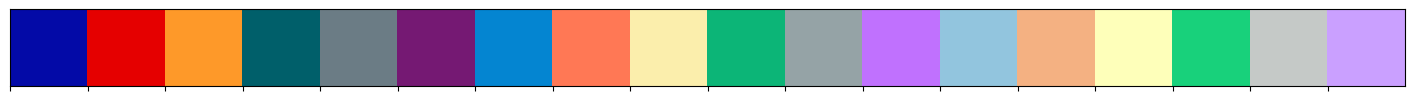

In [4]:
sns.palplot(sns.color_palette(palette[:18]))

In [5]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee, afficheSeparationsBinaires

In [6]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram,\
                         affichageDistribution,afficheColonneCible, add_median_labels, formatPct, createColumnsQualitatives

In [7]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [8]:
projet = initProjet(repertoireRacine='.',nomProjet='DiabetesHealthIndicators-Classifications')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
        <tr>                                                                                   
             <th style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>diabetes_binary_health_indicators_BRFSS2015.csv</th>
             <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/diabetes.jpg" width="128"></th>
        </tr>  
<table>   
<table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;"> </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>    
    <tr>
        <th  style="text-align:left">0 </th>                            
        <th  style="text-align:left;color:red;font-style: italic">Diabetes_binary </th> 
        <th  style="text-align:left;color:red;font-style: italic">you have diabetes (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">1 </th>                            
        <th  style="text-align:left">HighBP </th>                            
        <th  style="text-align:left">Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">2 </th>                            
        <th  style="text-align:left">HighChol </th>                          
        <th  style="text-align:left">Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">3 </th>                            
        <th  style="text-align:left">CholCheck </th>                         
        <th  style="text-align:left">Cholesterol check within past five years (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">4 </th>                            
        <th  style="text-align:left">BMI </th>                               
        <th  style="text-align:left">Body Mass Index (BMI)</th>
    </tr> 
    <tr>
        <th  style="text-align:left">5 </th>                            
        <th  style="text-align:left">Smoker </th>                            
        <th  style="text-align:left">Have you smoked at least 100 cigarettes in your entire life? [Note : 5 packs = 100 cigarettes] (0,1)</th>
    </tr>  
    <tr>
        <th  style="text-align:left">6 </th>                            
        <th  style="text-align:left">Stroke </th>                            
        <th  style="text-align:left">(Ever told) you had a stroke. (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">7 </th>                            
        <th  style="text-align:left">HeartDiseaseorAttack </th>              
        <th  style="text-align:left">Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)</th>
    </tr>  
    <tr>
        <th  style="text-align:left">8 </th>                            
        <th  style="text-align:left">PhysActivity </th>                      
        <th  style="text-align:left">Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)</th>
    </tr>   
    <tr>
        <th  style="text-align:left">9 </th>                            
        <th  style="text-align:left">Fruits </th>                            
        <th  style="text-align:left">Consume Fruit 1 or more times per day (0,1)</th>
    </tr> 
    <tr>
        <th  style="text-align:left">10 </th>                            
        <th  style="text-align:left">Veggies </th>                           
        <th  style="text-align:left">Consume Vegetables 1 or more times per day (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">11 </th>                            
        <th  style="text-align:left">HvyAlcoholConsump </th>                 
        <th  style="text-align:left">Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)</th>
    </tr> 
    <tr>
        <th  style="text-align:left">12 </th>                            
        <th  style="text-align:left">AnyHealthcare </th>                     
        <th  style="text-align:left">Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)</th>
    </tr>  
    <tr>
        <th  style="text-align:left">13 </th>                            
        <th  style="text-align:left">NoDocbcCost </th>                       
        <th  style="text-align:left">Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">14 </th>                            
        <th  style="text-align:left">GenHlth </th>                           
        <th  style="text-align:left">Would you say that in general your health is  rate (1 ~ 5)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">15 </th>                            
        <th  style="text-align:left">MentHlth </th>                          
        <th  style="text-align:left">Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)</th>
    </tr>
    <tr>
        <th  style="text-align:left">16 </th>                            
        <th  style="text-align:left">PhysHlth </th>                          
        <th  style="text-align:left">Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">17 </th>                            
        <th  style="text-align:left">DiffWalk </th>                          
        <th  style="text-align:left">Do you have serious difficulty walking or climbing stairs? (0,1)</th>
    </tr>
    <tr>
        <th  style="text-align:left">18 </th>                            
        <th  style="text-align:left">Sex </th>                               
        <th  style="text-align:left">Indicate sex of respondent (0,1) (Female or Male)</th>
    </tr>    
    <tr>
        <th  style="text-align:left">19 </th>                            
        <th  style="text-align:left">Age </th>                               
        <th  style="text-align:left">Fourteen-level age category (1 ~ 14)</th>
    </tr>
    <tr>
        <th  style="text-align:left">20 </th>                            
        <th  style="text-align:left">Education </th>                         
        <th  style="text-align:left">What is the highest grade or year of school you completed? (1 ~ 6)</th>
    </tr>
    <tr>
        <th  style="text-align:left">21 </th>                            
        <th  style="text-align:left">Income </th>                            
        <th  style="text-align:left">Is your annual household income from all sources  (If respondent refuses at any income level, code "Refused.") (1 ~ 8)</th>
    </tr>    
</table>

In [9]:
donnees = pd.read_csv('../donnees/Diabetes Health Indicators Dataset/diabetes_binary_health_indicators_BRFSS2015.csv').astype('int16')
cible = 'Diabetes_binary'
donnees.reset_index(inplace=True)
donnees.set_index(['index']+[cible],inplace=True)

In [10]:
donnees = donnees[::20]

In [11]:
donnees.sample(5)

,,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
index,Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
139380,0,0,1,1,35,1,0,0,1,0,1,...,1,0,1,0,0,0,1,3,5,8
42220,0,1,1,1,27,1,0,1,1,0,0,...,1,0,3,0,1,0,1,13,4,7
169480,0,0,1,1,24,0,0,0,1,1,1,...,1,0,3,10,20,1,0,10,5,4
144800,0,0,0,1,29,0,0,0,1,1,1,...,1,0,2,0,0,0,1,7,6,8
195880,0,0,1,1,30,1,0,0,0,0,1,...,0,1,3,20,30,1,0,4,4,1


In [12]:
donnees.describe().style.format("{:0.2f}") #.background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00
mean,0.43,0.43,0.96,28.41,0.45,0.04,0.10,0.75,0.63,0.81,0.06,0.95,0.08,2.52,3.15,4.25,0.17,0.44,8.04,5.06,6.06
std,0.50,0.50,0.19,6.58,0.50,0.20,0.30,0.43,0.48,0.40,0.23,0.22,0.28,1.06,7.37,8.71,0.37,0.50,3.07,0.98,2.08
min,0.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,92.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [13]:
for col in donnees.columns:
    print(f'{col:26s} {donnees[col].sort_values().nunique():4d} {donnees[col].sort_values().unique()}')

HighBP                        2 [0 1]
HighChol                      2 [0 1]
CholCheck                     2 [0 1]
BMI                          64 [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 61
 62 63 64 65 67 70 71 73 75 77 79 81 84 87 89 92]
Smoker                        2 [0 1]
Stroke                        2 [0 1]
HeartDiseaseorAttack          2 [0 1]
PhysActivity                  2 [0 1]
Fruits                        2 [0 1]
Veggies                       2 [0 1]
HvyAlcoholConsump             2 [0 1]
AnyHealthcare                 2 [0 1]
NoDocbcCost                   2 [0 1]
GenHlth                       5 [1 2 3 4 5]
MentHlth                     29 [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 25
 26 27 28 29 30]
PhysHlth                     31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
DiffWalk              

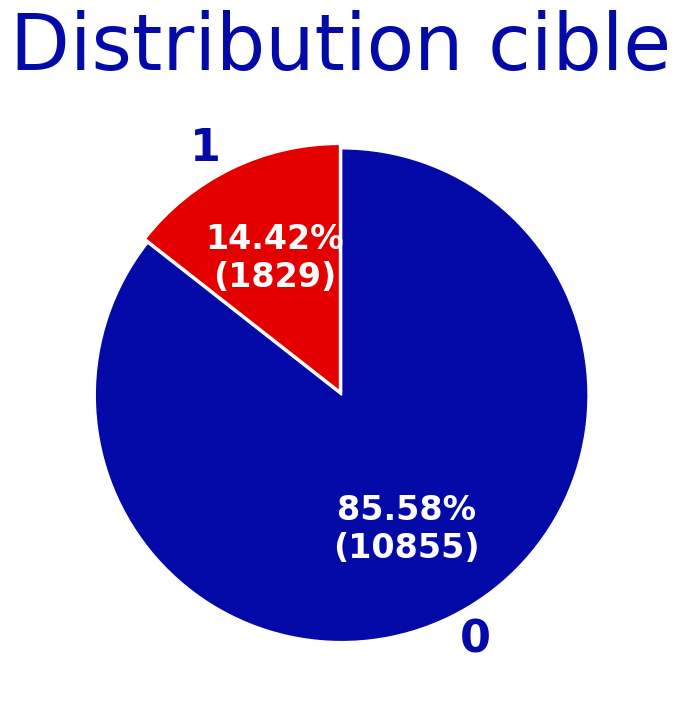

In [14]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(8,8), subplot_kw=dict(aspect="equal"))

affichage = donnees.reset_index().groupby(cible).Income.count().reset_index().rename(columns={'Income':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage[cible].values,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage[cible].count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Distribution cible",fontdict=dict(color="#030aa7", size=56));